# Introduction

La siguiente libreta contiene los procedimientos y comentarios para el Exploratory Data Analysis (EDA) cuyo fin es el de obtener insights referentes a la distribución de los atributos y encontrar posibles patrones relevantes para la predicción. 

First, a basic exploration of the data is performed to determine whether it is necessary to perform a Data Wrangling to homogenize the data types in each feature and target, and also to describe the data using basic descriptive statistics in order to begin to understand the data available and possible complications for learning the model. The above is exposed in the section [First Exploration](#2-first-exploration), being the most relevant that the number of instances are balanced with respect to the target (``Growth_Milestone``).

In [Distribution of Features](#3-distribution-of-features) the first relevant insights are presented, where plots of the numerical and categorical features stratified by the ``Growth_Milestone`` class were made, that means, the data were shown based on whether or not there was significant growth. From the plots generated, it is shown that in the numerical attributes there is a high overlap, but values for low values of these attributes favor plant growth; and the use of fertilizers also a significant growth.

# 0. Import Libraries and Other Code

In [2]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from typing import Any

In [3]:
# Import functions for First Exploration

from Function_FirstExploration import SplittingFeaturesBasedDataType , Standardization , CategoricalDescription

# Import functions for Distribution of Features

from Plots_DistributionFeatures import PlotDistributionsByTarget

In [4]:
# def PlotCorelationMatrixByValueTarget(Dataset:pd.DataFrame,NumericalFeatures:list[str],Target:str,ValueTarget:Any,MeaningValue:str) -> None:
#     """
#         Function for plotting correlation between 
#         features
#     """
#     fig , axes = plt.subplots()

#     correlation_matrix = Dataset.query(f"{Target} == @ValueTarget")[NumericalFeatures].corr()
#     sns.heatmap(correlation_matrix,vmin=-1,vmax=1,annot=True,cmap=Color_Map,ax=axes)

#     fig.suptitle(' '.join([MeaningValue,GetFeatureName(Target)]))

# 1. Load Dataset 

In [5]:
# Loading dataset

PlantGrowth_Dataset = pd.read_csv("plant_growth_data.csv")

print(f'Dataset shape is: {PlantGrowth_Dataset.shape}')

# Example of records
PlantGrowth_Dataset.head(5)

Dataset shape is: (193, 7)


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


# 2. First Exploration

The different features and targets have the expected data types from the dataset description in [[1]](#references) so it is not necessary to reformat them, likewise there are no missing values in any of the attributes.

The three numerical attributes follow different ranges of values, so the values have to be standardized to make a comparison between them. Therefore, it is necessary to standardize the values in order to make a comparison between them. In doing so, they follow different distributions using only the quartiles, so it could be expected that these attributes come from different phenomena or interactions. The ``Sunlight_Hours`` attribute appears to follow a more normal distribution, because its median $Q_2$ is almost $0$ while its quartiles $Q_1$ and $Q_3$ are almost the same except for the sign. About the ``Humidity`` attribute, its median $Q_2$ is not so close to $0$ but instead is equidistant to its other quartiles, so it is unskewed. While the ``Temperature`` attribute tends to have a negative skewness, so temperatures will tend to be higher with respect to the mean.

Each categorical attribute has three unique values. The ``Soil_Type`` attribute has its three balanced values, that is, they have the same number of instances per value, so the model will have enough different instances to distinguish between possible cases. For the attributes ``Water_Frequency`` and ``Fertilizer_Type`` an imbalance in the instances per value can be observed, this could be related to the fact that possibly not enough experiments were generated with the values of these attributes to cover the different possibilities.

There are the same number of instances for both classes of the target (``Growth_Milestone``), so the learning of the model will be able to capture, to some extent, the relevant relationships to distinguish between classes, this a priori. The latter could be false due to the unbalance of categorical attributes, unless they follow a noticeable pattern according to the class of ``Growth_Milestone``.

In [6]:
# Data types of variables

PlantGrowth_Dataset.dtypes

Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object

In [7]:
# Splitting labels into features and target

labels_variables = PlantGrowth_Dataset.columns

Features = labels_variables[:-1]
Target = labels_variables[-1]

# Splitting features into numerical and categorical

CategoricalFeatures , NumericalFeatures  = SplittingFeaturesBasedDataType(PlantGrowth_Dataset,Features)

In [8]:
# Basic descriptive : Numerical features

PlantGrowth_Dataset[NumericalFeatures].describe()

,Sunlight_Hours,Temperature,Humidity
count,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927
std,1.599509,5.354170,12.631799
min,4.033133,15.200000,30.567682
25%,5.477000,20.637095,49.300000
50%,6.833290,25.912336,59.182806
75%,8.241144,29.757938,69.100000
max,9.913903,34.810103,79.648240


In [9]:
# Basic descriptive : Numerical features -- Standardization

PlantGrowth_Dataset[NumericalFeatures].apply(Standardization).describe()

,Sunlight_Hours,Temperature,Humidity
count,1.930000e+02,1.930000e+02,1.930000e+02
mean,1.587676e-16,-4.279823e-16,8.283529e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.746381e+00,-1.844560e+00,-2.179519e+00
25%,-8.436869e-01,-8.290718e-01,-6.965696e-01
50%,4.254564e-03,1.561865e-01,8.580558e-02
75%,8.844340e-01,8.744309e-01,8.709031e-01
max,1.930229e+00,1.818025e+00,1.705958e+00


In [10]:
# Basic descriptive : Categorical features

PlantGrowth_Dataset[CategoricalFeatures].describe()

,Soil_Type,Water_Frequency,Fertilizer_Type
count,193,193,193
unique,3,3,3
top,clay,daily,none
freq,67,74,74


In [11]:
# Basic descriptive : Categorical features -- Soil_Type

CategoricalDescription(PlantGrowth_Dataset,CategoricalFeatures[0])

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [12]:
# Basic descriptive : Categorical features -- Water_Frequency

CategoricalDescription(PlantGrowth_Dataset,CategoricalFeatures[1])

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [13]:
# Basic descriptive : Categorical features -- Fertilizer_Type

CategoricalDescription(PlantGrowth_Dataset,CategoricalFeatures[2])

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [14]:
# Basic descriptive : Target

CategoricalDescription(PlantGrowth_Dataset,Target)

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

# 3. Distribution of Features

In the plots of the numerical features, it can be noticed that there is an overlapping of the distributions, that is, many of the values of the attributes are concentrated in the same regions for both categories or classes. One of the first distinctions is that the first $Q_1$ and third $Q_3$ quartiles when there is significant growth are always less than or equal to those of the other class; this is related to the fact that there is a preference for certain values for significant growth, that means, there are ranges of ``Sunlight_Hours``, ``Temperature`` and ``Humidity`` that favor better growth for the plant. In contrast with the ranges when there is no significant growth, these take higher and wider values, this could be related to the fact that if there is no control over these parameters, they could affect the optimal growth of the plant, due to an overexposure of the plants to these factors.

In the plots of the categorical features, two relevant facts can be seen. The ``Soil_Type`` attribute has an impact on growth since loam soils positively affect plant growth while clay soils negatively affect plant growth, so it could indicate a strong interaction about the significant growth of a plant depending on the type of soil it is on. On the other hand, the ``Fertilizer_Type`` attribute shows an interesting fact that the use of fertilizers can significantly affect plant growth, otherwise, by having access to better and larger amounts of nutrients, a plant will be favored in significant growth.

## 3.1 Numerical Features

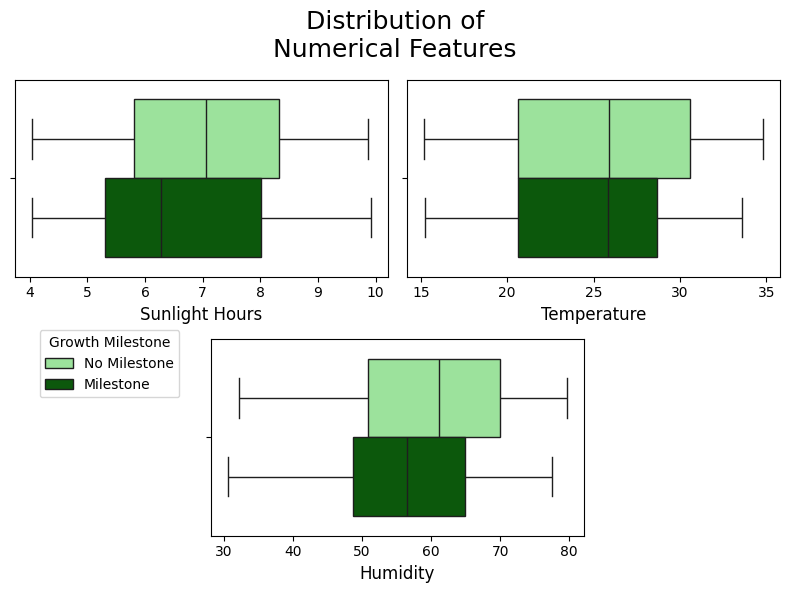

In [15]:
# Plotting of Numerical features

PlotDistributionsByTarget(PlantGrowth_Dataset,NumericalFeatures,Target,sns.boxplot,'Numerical')

## 3.2 Categorical Features

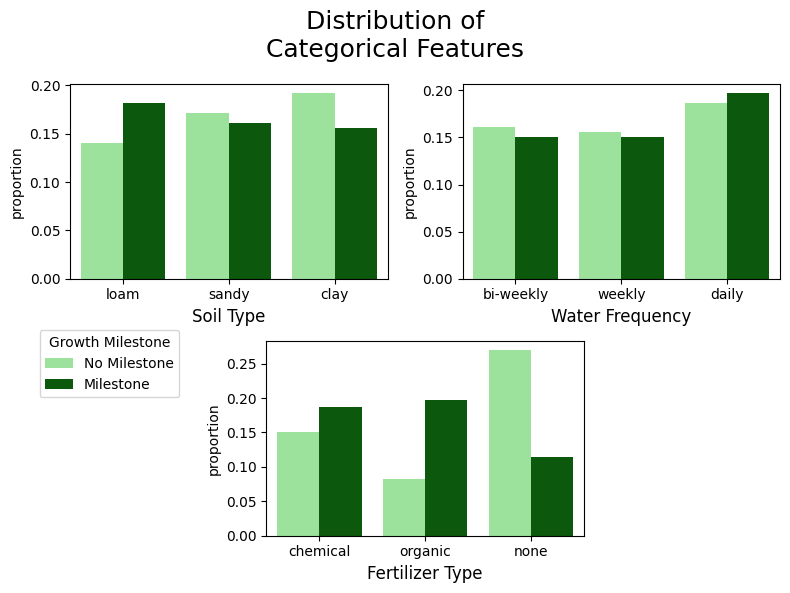

In [16]:
# Plotting of Categorical features

PlotDistributionsByTarget(PlantGrowth_Dataset,CategoricalFeatures,Target,sns.countplot,'Categorical',{'stat':'proportion'})

# 4. Hypothesis Testing

Para apoyar algunas de las observaciones realizadas en [Distribution of Features](#3-distribution-of-features), se realizan sus respectivas pruebas de hipótesis con el fin de afinar los insights adquiridos previamente. Los dos tipo de hipótesis nulas a probar son:

1. *Atributos Numéricos*: Las distribuciones de los atributos (``Sunlight_Hours``, ``Temperature`` y ``Humidity``) son iguales independientemente de si hay o no crecimiento significativo ``Growth_Milestone``

2. *Atributos Categóricos*: Los atributos ``Soil_Type``,``Fertilizer_Type`` y ``Water_Frequency`` son independientes de si hay o no crecimiento significativo ``Growth_Milestone``

Para las diferentes pruebas de hipótesis se usa el mismo nivel de significancia de $\alpha = 5\%$

In [85]:
significance = 0.05

## 4.1 Hypothesis about Numerical Features

En general el conjunto de hipótesis son de la forma:
$$H_0 : \text{Feature}_0 \sim \text{Feature}_1$$
$$H_1 : \text{Feature}_0 \nsim \text{Feature}_1$$

Donde $\text{Feature}_i$ se refiere a la distribución de ``Feature`` según la presencia ($i = 1$) o no ($i = 0$) de crecimiento significativo.

In [88]:
from scipy.stats import ks_2samp

def StratifiedFeature(Dataset:pd.DataFrame,Feature:str,StratifyFeature:str,StrataValues:list) -> list[pd.DataFrame]:
    return [Dataset.query(f"`{StratifyFeature}` == @strata_value")[Feature] for strata_value in StrataValues]

def SameDistribution(Sample_1:pd.Series|np.ndarray,Sample_2:pd.Series|np.ndarray,Significance:float=0.05) -> str:
    results_test = ks_2samp(Sample_1,Sample_2)
    if (p_value := results_test.pvalue) >= Significance:
        result = f'Both samples come from the same distribution with a p-value {p_value}'
    else:
        result = f'Both samples come from different distributions with a p-value {p_value}'
    return result

In [89]:
for numerical_feature in NumericalFeatures:
    samples = StratifiedFeature(PlantGrowth_Dataset,numerical_feature,Target,[0,1])
    result_test = SameDistribution(*samples,significance)

    print(f'For {numerical_feature}:\n'+result_test+'\n')

For Sunlight_Hours:
Both samples come from the same distribution with a p-value 0.10701152541455504

For Temperature:
Both samples come from the same distribution with a p-value 0.1742564048506251

For Humidity:
Both samples come from different distributions with a p-value 0.04138311927591686



## 4.2 Hypothesis about Categorical Features

En general el conjunto de hipótesis son de la forma:
$$H_0 : \text{Feature } \& \text{ Growth\_Milestone } \text{are independents}$$
$$H_1 : \text{Feature } \& \text{ Growth\_Milestone } \text{are not independents}$$

Donde $\text{Feature}$ se refiere a algún atributo categórico ``Feature``.

In [82]:
from scipy.stats import chi2_contingency

def ContingencyTable(Dataset:pd.DataFrame,ValuesCount:str,FeatureIndex:str,FeatureColumns:str) -> pd.DataFrame:
    return Dataset.pivot_table(values=ValuesCount,index=FeatureIndex,columns=FeatureColumns,aggfunc='count')

def AreIndependents(ContingencyTable:pd.DataFrame|np.ndarray,Significance:float=0.05) -> str:
    result_test = chi2_contingency(ContingencyTable)
    if (p_value := result_test.pvalue) >= Significance:
        result = f'The two variables are independent with a p-value {p_value}'
    else:
        result = f'The two variables are dependent with a p-value {p_value}'
    return result

In [90]:
for categorical_feature in CategoricalFeatures:
    contingency_table = ContingencyTable(PlantGrowth_Dataset,NumericalFeatures[0],categorical_feature,Target)
    result_test = AreIndependents(contingency_table,significance)

    print(f'For {categorical_feature}:\n'+result_test+'\n')

For Soil_Type:
The two variables are independent with a p-value 0.40232927094876947

For Water_Frequency:
The two variables are independent with a p-value 0.9359005655622414

For Fertilizer_Type:
The two variables are dependent with a p-value 1.7784405332359295e-05



# References

* [1] Plant Growth Data Classification. Kaggle, [gortorozyannnn](https://www.kaggle.com/gorororororo23). https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification